In [20]:
import polars as pl
from matplotlib import pyplot as plt
import seaborn as sns

In [21]:
from datasets import load_dataset_builder, load_dataset

ds_builder = load_dataset_builder("Artificio/WikiArt_Full")
ds_builder.info.features

{'title': Value(dtype='string', id=None),
 'artist': Value(dtype='string', id=None),
 'date': Value(dtype='string', id=None),
 'genre': Value(dtype='string', id=None),
 'style': Value(dtype='string', id=None),
 'description': Value(dtype='string', id=None),
 'filename': Value(dtype='string', id=None),
 'image': Image(mode=None, decode=True, id=None),
 'embeddings_pca512': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None),
 'resnet50_non_robust_feats': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None),
 'resnet50_robust_feats': Sequence(feature=Value(dtype='float32', id=None), length=-1, id=None)}

In [22]:
dataset = load_dataset("Artificio/WikiArt_Full", split="train")    # only train dataset
dataset.to_parquet('local_wikiart.parquet')

Creating parquet from Arrow format:   0%|          | 0/1033 [00:00<?, ?ba/s]

3352196929

In [23]:
df = pl.read_parquet('local_wikiart.parquet', columns=['title', 'artist', 'date', 'genre', 'style', 'image'])

In [24]:
len(df)

103250

In [25]:
df.head()

title,artist,date,genre,style,image
str,str,str,str,str,struct[2]
"""Cornelia Street""","""John French Sloan""","""1920""","""cityscape""","""New Realism""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}"
"""O Diabo, a Paraquedista, Etc""","""Rene Bertholo""","""1997.0""","""figurative""","""Surrealism""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}"
"""Milking the Cow ""","""Yasuo Kuniyoshi""","""1927.0""","""genre painting""","""Expressionism""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}"
"""Self-portrait""","""Lajos Tihanyi""","""1920.0""","""self-portrait""","""Expressionism""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}"
"""All healing""","""Raphael Kirchner""","""None""","""genre painting""","""Art Nouveau (Modern)""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}"


In [26]:
df.describe()

statistic,title,artist,date,genre,style,image
str,str,str,str,str,str,f64
"""count""","""103250""","""103250""","""103250""","""103250""","""103250""",103250.0
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0
"""mean""",null,null,null,null,null,null
"""std""",null,null,null,null,null,null
"""min""",""" 2 Impressions: Swatch""",""" Architect's visual ""","""1059.0""","""None""","""Abstract Art""",null
"""25%""",null,null,null,null,null,null
"""50%""",null,null,null,null,null,null
"""75%""",null,null,null,null,null,null
"""max""","""鬼趣图""","""∞ /detail 868149-893746""","""rver""","""yakusha-e""","""Zen""",null


In [27]:
def show_distribution(column):
    counts = df.group_by(column).agg([
        pl.count(column).alias("count")
    ]).sort("count")
    print(f'{column.capitalize()} Count: {len(counts[column])}')
    plt.figure(figsize=(20, 6))
    plt.bar(counts[column], counts["count"])
    plt.xlabel(column.capitalize())
    plt.ylabel("Count")
    plt.title(f"{column.capitalize()} Distribution")
    plt.xticks(rotation=90)
    plt.show()

Genre Count: 43


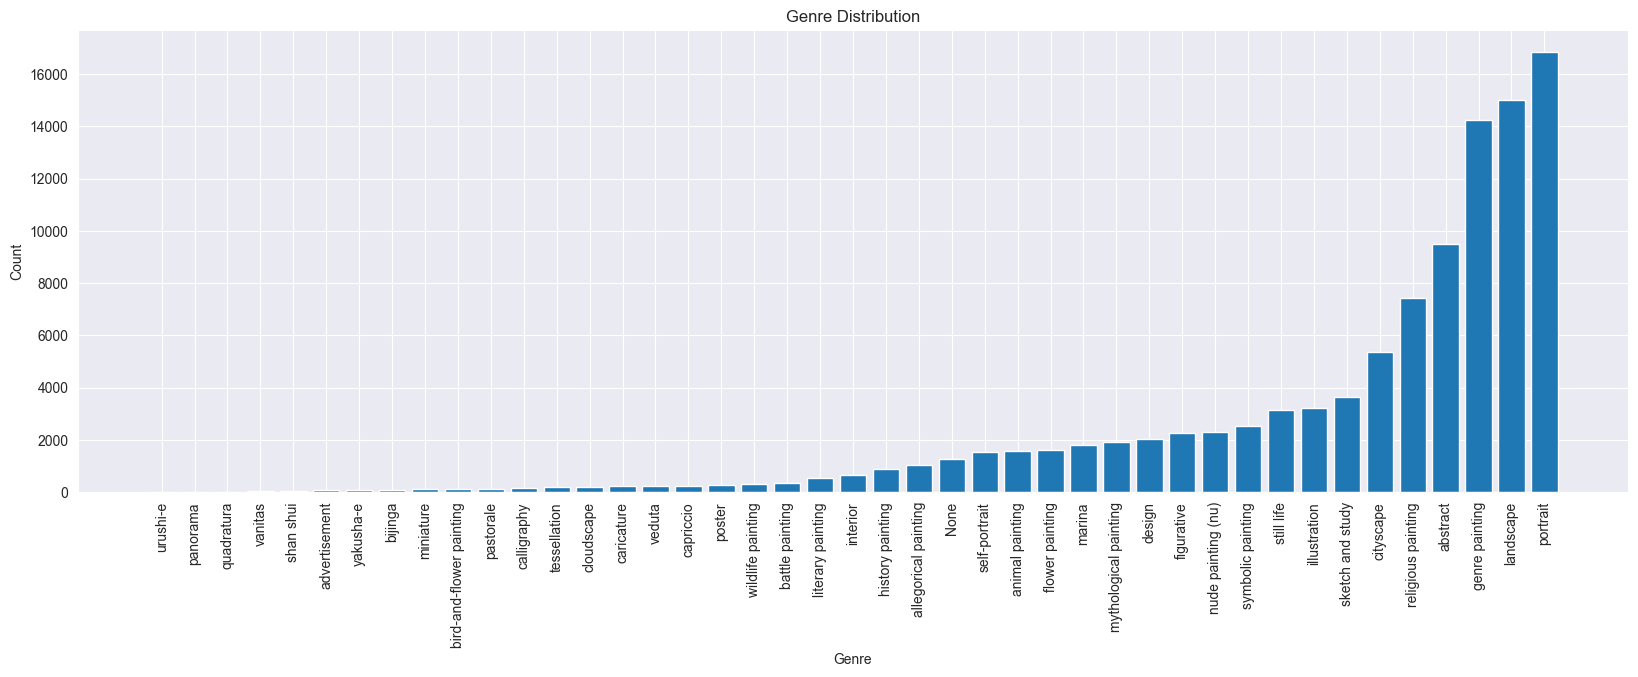

In [28]:
show_distribution('genre')

Style Count: 137


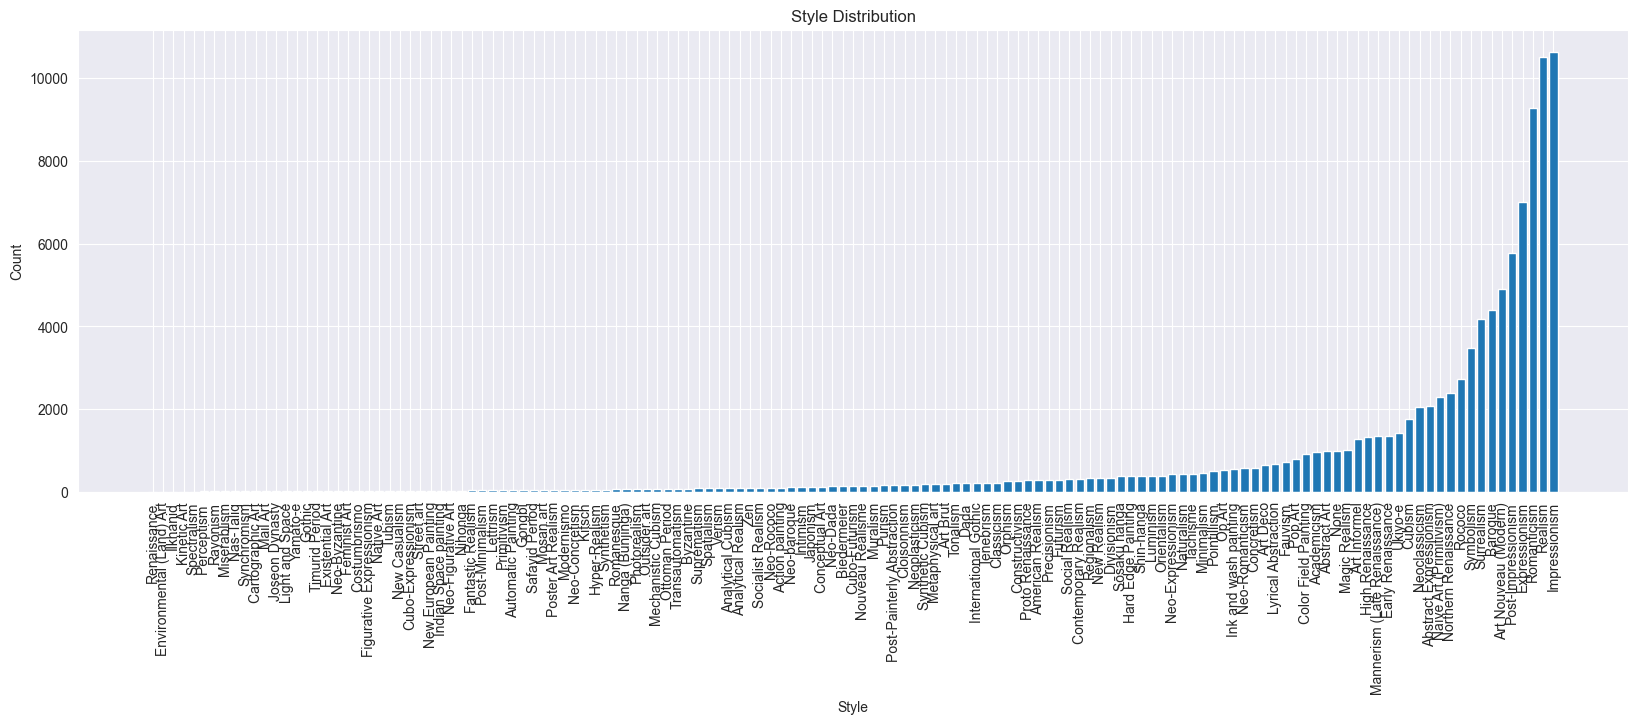

In [29]:
show_distribution('style')

In [30]:
artist_counts = df.group_by("artist").agg([
    pl.count("artist").alias("count")
]).sort("count")

print(f'Artist Count: {len(artist_counts["count"])}')
print(f'Artists with the fewest  artworks')
print(artist_counts.head(5))
print(f'Artists with the most artworks')
print(artist_counts.tail(5))

Artist Count: 2319
Artists with the fewest  artworks
shape: (5, 2)
┌────────────────────────────────┬───────┐
│ artist                         ┆ count │
│ ---                            ┆ ---   │
│ str                            ┆ u32   │
╞════════════════════════════════╪═══════╡
│ Hécate et les trois sorcière…  ┆ 1     │
│ 7                              ┆ 1     │
│ vent lumiere                   ┆ 1     │
│ Vue de la route du col d'Aspin ┆ 1     │
│ Chincoteague                   ┆ 1     │
└────────────────────────────────┴───────┘
Artists with the most artworks
shape: (5, 2)
┌────────────────────────────┬───────┐
│ artist                     ┆ count │
│ ---                        ┆ ---   │
│ str                        ┆ u32   │
╞════════════════════════════╪═══════╡
│ Marc Chagall               ┆ 500   │
│ Giovanni Battista Piranesi ┆ 500   │
│ Ivan Shishkin              ┆ 500   │
│ Ilya Repin                 ┆ 500   │
│ Gustave Dore               ┆ 500   │
└──────────────────────

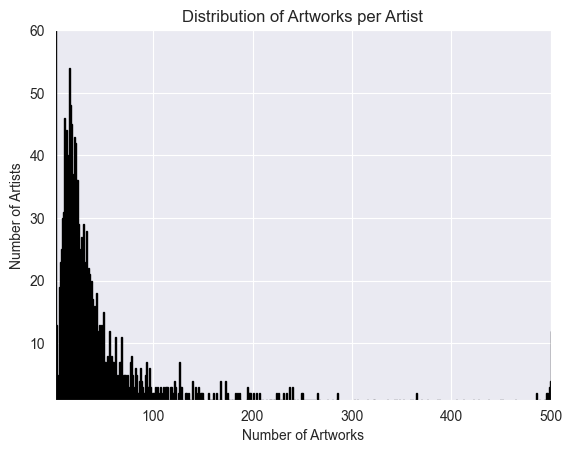

In [31]:
plt.hist(artist_counts["count"], bins=range(1, 502), edgecolor="black")
plt.xlabel("Number of Artworks")
plt.ylabel("Number of Artists")
plt.title("Distribution of Artworks per Artist")
plt.ylim(1, 60)
plt.xlim(1, 500)
plt.show()

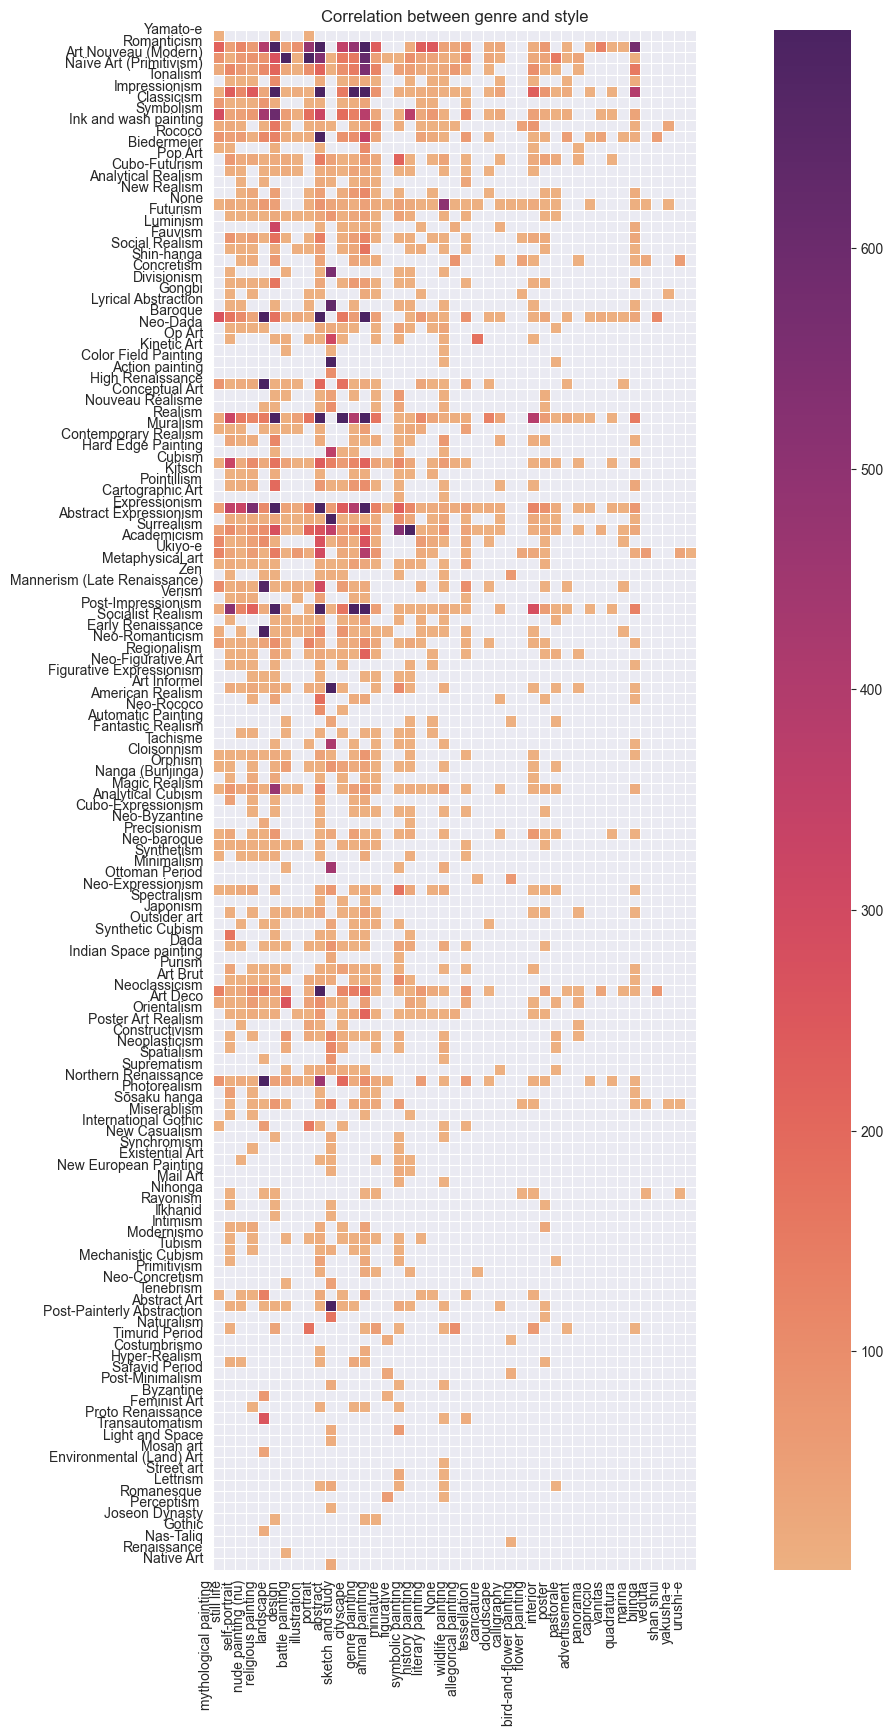

In [32]:
dropped_columns = df.columns
dropped_columns.remove('genre')
dropped_columns.remove('style')
corr_df = df.clone().drop(dropped_columns)

corr_df = corr_df.group_by(['genre', 'style']).agg(pl.col('genre').count().alias('count'))
correlation_matrix = corr_df.pivot(index='style', on='genre', values='count')
style_names = correlation_matrix.drop_in_place('style')
names = correlation_matrix.columns
masked_matrix = correlation_matrix.clone()
for name in names:
    masked_matrix = masked_matrix.with_columns(
        pl.when(pl.col(name) > 0)
        .then(0)
        .otherwise(1)
        .alias(name)
    )
mask = masked_matrix.to_numpy()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='flare', fmt='', linewidths=.5, square=True, robust=True, mask=mask)
plt.title('Correlation between genre and style')
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90, ha='right')
plt.yticks(ticks=range(len(style_names)), labels=style_names)
plt.show()

In [9]:
import numpy as np
import random
from PIL import Image, ImageDraw
import pandas as pd
import matplotlib.pyplot as plt
import io

# Function to damage the image by drawing a white square mask
def damage_image(image: Image.Image, mask_size_ratio: float = 1/16) -> Image.Image:
    width, height = image.size
    mask_size = int(min(width, height) * np.sqrt(mask_size_ratio))
    draw = ImageDraw.Draw(image)
    x = random.randint(0, width - mask_size)
    y = random.randint(0, height - mask_size)
    draw.rectangle([x, y, x + mask_size, y + mask_size], fill=(255, 255, 255))
    return image

# Load the parquet file using pandas
df = pd.read_parquet('local_wikiart.parquet', columns=['title', 'artist', 'date', 'genre', 'style', 'image'])

# Function to process and damage images
def process_images_with_damage(df, num_images=10, mask_size_ratio=1/16):
    damaged_images = []
    valid_image_paths = 0

    for i in range(min(num_images, len(df))):
        row = df.iloc[i]

        # Check if the 'image' field is a dictionary
        image_data = row['image']
        try:
            if isinstance(image_data, dict):
                # Scenario 1: If the dictionary contains a path to the image
                if 'path' in image_data:
                    image_path = image_data['path']
                    image = Image.open(image_path)  # Open image from the path
                # Scenario 2: If the dictionary contains binary data
                elif 'bytes' in image_data:
                    image_bytes = image_data['bytes']
                    image = Image.open(io.BytesIO(image_bytes))  # Open image from bytes
                else:
                    raise ValueError(f"Unknown structure in 'image' column for row {i+1}")
            else:
                raise ValueError(f"Unexpected data type in 'image' column for row {i+1}")

            valid_image_paths += 1
            damaged_image = damage_image(image, mask_size_ratio=mask_size_ratio)
            damaged_images.append((damaged_image, f"Image {i+1}"))
        except Exception as e:
            print(f"Error processing image {i+1}: {e}")

    return damaged_images, valid_image_paths

# Process the images
damaged_images, valid_image_paths = process_images_with_damage(df, num_images=10)
total_images = len(df)

print(f"Total images in dataset: {total_images}")
print(f"Valid images processed: {valid_image_paths}")

# Function to display damaged images
def show_damaged_images(damaged_images, num_examples=5):
    num_examples = min(num_examples, len(damaged_images))
    fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))

    for i, (damaged_image, title) in enumerate(damaged_images[:num_examples]):
        axes[i].imshow(damaged_image)
        axes[i].axis('off')
        axes[i].set_title(title)

    plt.show()

# Display damaged images
show_damaged_images(damaged_images)


KeyboardInterrupt: 

In [13]:
import pandas as pd
import numpy as np
import random
from PIL import Image
import io
import matplotlib.pyplot as plt

df = pd.read_parquet('local_wikiart.parquet', columns=['title', 'artist', 'date', 'genre', 'style', 'image'])

def decode_image(image_dict):
    if 'bytes' in image_dict:
        img_bytes = image_dict['bytes']
        img = Image.open(io.BytesIO(img_bytes))
        return img
    return None

def apply_damage(image):
    img = np.array(image)
    height, width, _ = img.shape
    mask_size = int(min(height, width) // 4)
    top_left_x = random.randint(0, width - mask_size)
    top_left_y = random.randint(0, height - mask_size)
    img[top_left_y:top_left_y + mask_size, top_left_x:top_left_x + mask_size] = [255, 255, 255]
    return Image.fromarray(img)

damaged_images = []
for idx, row in df.iterrows():
    img_dict = row['image']
    img = decode_image(img_dict)

    if img is not None:
        damaged_img = apply_damage(img)
        damaged_images.append(damaged_img)

if damaged_images:
    damaged_images[0].show()

# for i, img in enumerate(damaged_images):
#     img.save(f'damaged_image_{i}.png')
